<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [4]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")
file_name  = "dataset.csv"

---


# Test Environment


In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
#This script reads a CSV file from the given path into a Pandas DataFrame. The first row is treated as headers by default (header=0).

import pandas as pd

# Updated path to the CSV file (assuming it's in the current directory as "dataset.csv")
file_path = 'dataset.csv'  # Change this if your file is in a different location

try:
    # Read the CSV into a DataFrame; the first row is used as column headers by default
    df = pd.read_csv(file_path, header=0)
    print("DataFrame loaded successfully!")  # Optional confirmation
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

<ipython-input-4-648ef060c0f3>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


DataFrame loaded successfully!


In [5]:
import pandas as pd

# Assumes df is a pre-loaded DataFrame
# Compute missing value counts per column
missing_counts = df.isnull().sum()

# Identify columns that contain at least one missing value
columns_with_missing = missing_counts[missing_counts > 0].index.tolist()

# Prepare a compact result structure
result = {
    'missing_counts_per_column': missing_counts.to_dict(),
    'columns_with_missing': columns_with_missing
}

# Display results
print("Missing value counts per column:")
print(missing_counts)
print("\nColumns with missing values:")
print(columns_with_missing)

print("\nSummary:")
print(result)

Missing value counts per column:
Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

Columns with missing values:
['Screen_Size_cm', 'Weight_kg']

Summary:
{'missing_counts_per_column': {'Unnamed: 0': 0, 'Manufacturer': 0, 'Category': 0, 'Screen': 0, 'GPU': 0, 'OS': 0, 'CPU_core': 0, 'Screen_Size_cm': 4, 'CPU_frequency': 0, 'RAM_GB': 0, 'Storage_GB_SSD': 0, 'Weight_kg': 5, 'Price': 0}, 'columns_with_missing': ['Screen_Size_cm', 'Weight_kg']}


In [6]:
import pandas as pd

# Assumes df is a pre-loaded DataFrame
# First, check the columns in df to verify
print("Available columns in df:", df.columns.tolist())  # This helps debug

# Replace missing Screen_Size_cm with the most frequent value, if the column exists
if 'Screen_Size_cm' in df.columns:
    df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mode().iloc[0])
else:
    print("Warning: Column 'Screen_Size_cm' does not exist in the DataFrame.")

# Replace missing Weight_kg with the mean value, if the column exists
if 'Weight_kg' in df.columns:
    df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())
else:
    print("Warning: Column 'Weight_kg' does not exist in the DataFrame.")

print("DataFrame processing complete.")

Available columns in df: ['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price']
DataFrame processing complete.


In [7]:
# Assuming df is your processed DataFrame
df.to_csv("updated_data.csv", index=False)

In [8]:
print("Available columns in df:", df.columns.tolist())

Available columns in df: ['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price']


In [9]:
# Assuming df is already loaded and processed from previous steps

# Check and convert Screen_Size_cm to float if the column exists
if 'Screen_Size_cm' in df.columns:
    df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
else:
    print("Warning: Column 'Screen_Size_cm' does not exist in the DataFrame.")

# Check and convert Weight_kg to float if the column exists
if 'Weight_kg' in df.columns:
    df['Weight_kg'] = df['Weight_kg'].astype(float)
else:
    print("Warning: Column 'Weight_kg' does not exist in the DataFrame.")

print("Column conversions complete.")

Column conversions complete.


In [10]:
# Assumes df is a pre-loaded DataFrame
# Convert centimeters to inches and create a new column if 'Screen_Size_cm' exists
if 'Screen_Size_cm' in df.columns:
    df['Screen_Size_inch'] = df['Screen_Size_cm'] / 2.54
else:
    print("Warning: Column 'Screen_Size_cm' does not exist in the DataFrame. Skipping conversion.")

# Convert kilograms to pounds and create a new column if 'Weight_kg' exists
if 'Weight_kg' in df.columns:
    df['Weight_pounds'] = df['Weight_kg'] * 2.2046226218
else:
    print("Warning: Column 'Weight_kg' does not exist in the DataFrame. Skipping conversion.")

# Remove the original columns if they exist
columns_to_drop = ['Screen_Size_cm', 'Weight_kg']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]  # Filter for existing columns
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"Removed columns: {columns_to_drop}")
else:
    print("No columns to remove.")

print("DataFrame processing complete.")


Removed columns: ['Screen_Size_cm', 'Weight_kg']
DataFrame processing complete.


In [11]:
# Normalize CPU_frequency in place by scaling with the column max
# This updates the existing column without creating a new attribute
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

In [12]:
import pandas as pd

# Assuming df is a pre-loaded DataFrame
# Check if 'Screen' column exists before processing
if 'Screen' in df.columns:
    # Convert 'Screen' into one-hot encoded indicators with names 'Screen_<value>'
    df1 = pd.get_dummies(df['Screen'], prefix='Screen')
    
    # Append the new indicator columns to the original DataFrame
    df = pd.concat([df, df1], axis=1)
    
    # Drop the original 'Screen' column
    df = df.drop(columns=['Screen'])
    print("One-hot encoding and column drop completed successfully.")
else:
    print("Warning: Column 'Screen' does not exist in the DataFrame. Skipping processing.")

print("DataFrame processing complete.")


One-hot encoding and column drop completed successfully.
DataFrame processing complete.


In [13]:
import os
print("Current directory:", os.getcwd())

Current directory: /drive/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/test


In [14]:
# Assuming df is your processed DataFrame
df.to_csv("updated_data.csv", index=False)


In [9]:
import pandas as pd

# Path to the CSV file; header row is used as column names
csv_path = "dataset.csv"

# Read the dataset from the CSV file
df = pd.read_csv(csv_path)

# Generate descriptive statistics for all columns, including object types
description = df.describe(include='all')

# Display the descriptive statistics
print(description.to_string())

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU          OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  Storage_GB_SSD  Weight_pounds        Price Price-binned  Screen-Full_HD  Screen-IPS_panel
count     238.000000  238.000000          238  238.000000  238.000000  238.000000  238.000000        238.000000     238.000000  238.000000      238.000000     238.000000   238.000000          238      238.000000        238.000000
unique           NaN         NaN           11         NaN         NaN         NaN         NaN               NaN            NaN         NaN             NaN            NaN          NaN            3             NaN               NaN
top              NaN         NaN         Dell         NaN         NaN         NaN         NaN               NaN            NaN         NaN             NaN            NaN          NaN          Low             NaN               NaN
freq             NaN         NaN           71         NaN         NaN         Na

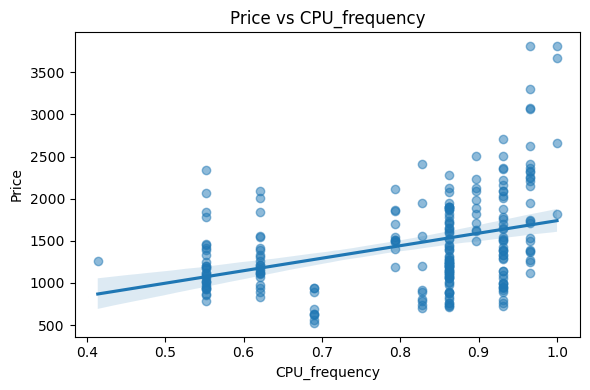

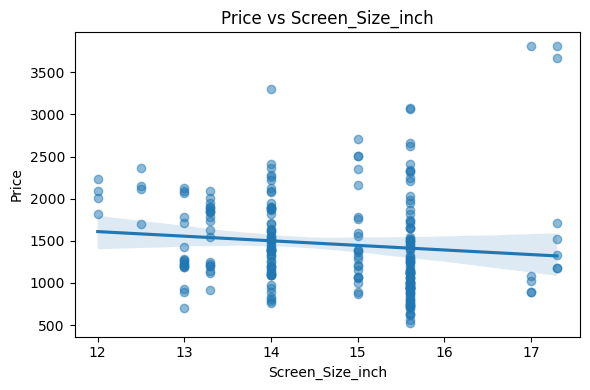

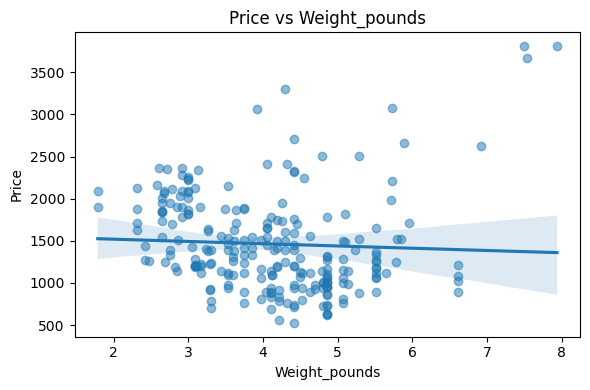

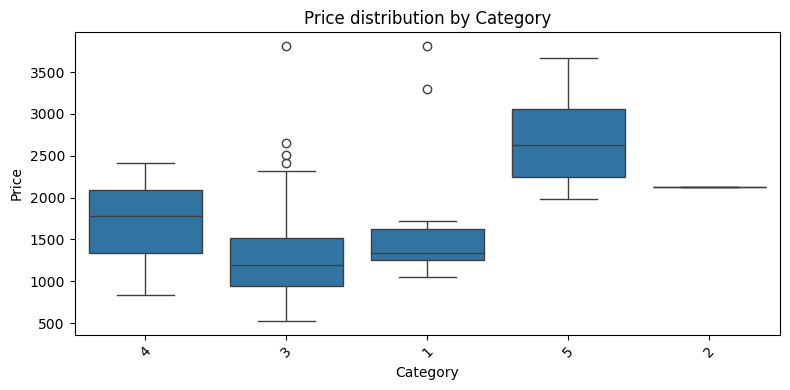

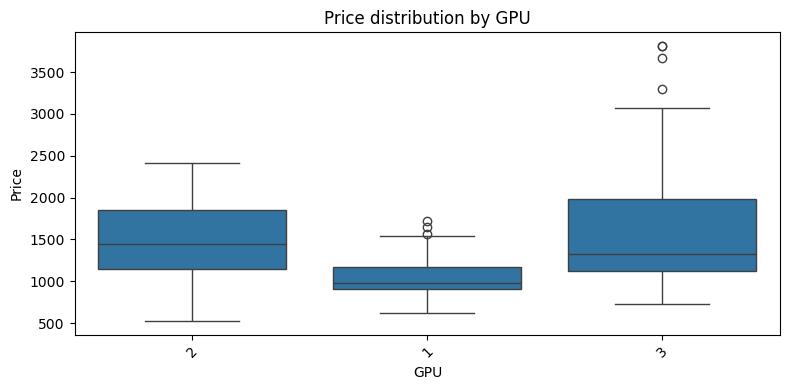

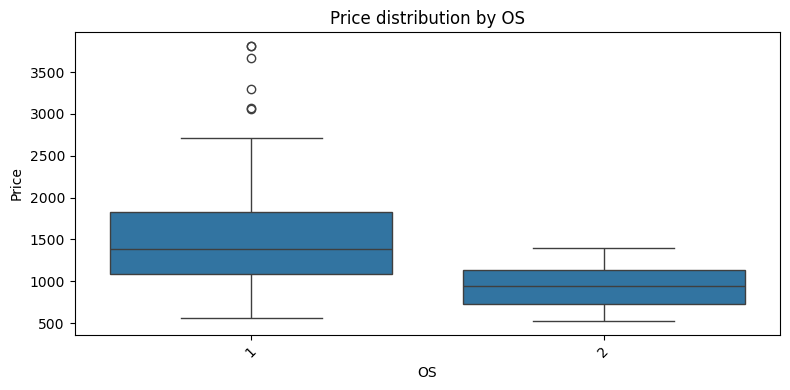

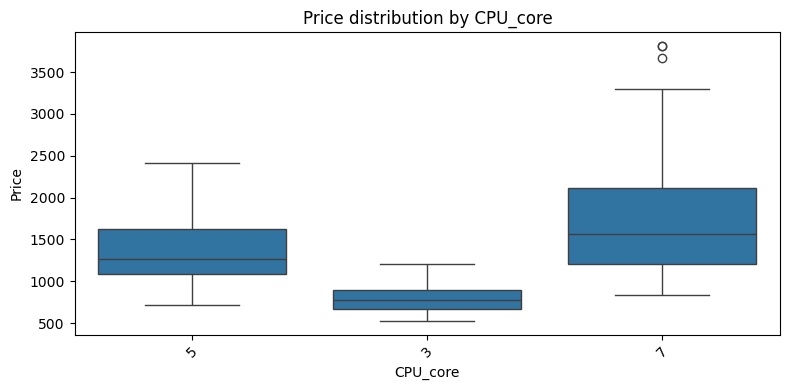

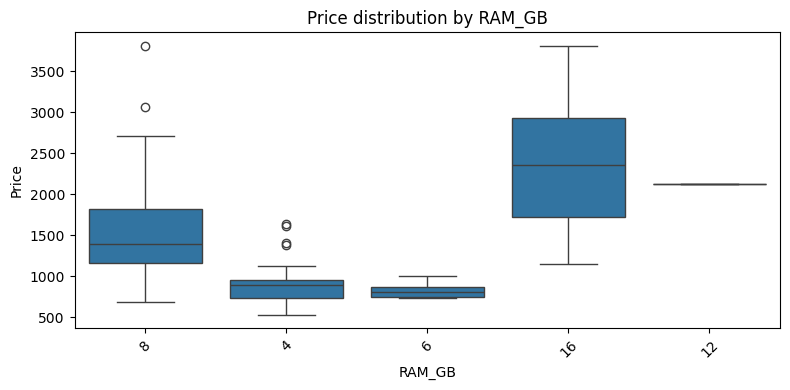

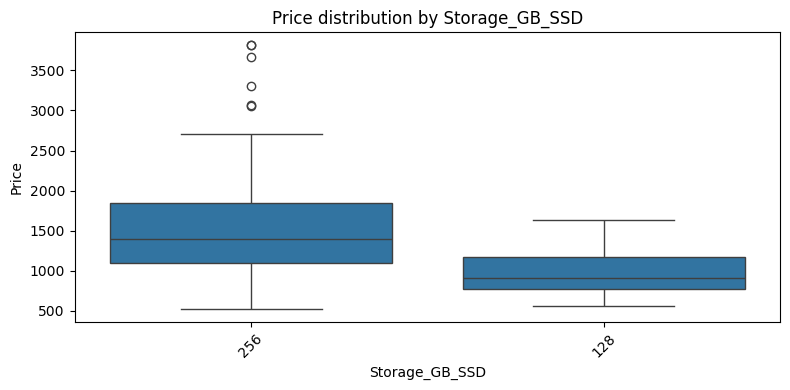

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the CSV file; assumes headers are in the first row
csv_path = "dataset.csv"
df = pd.read_csv(csv_path)

# 1) Regression plots: Price vs each continuous feature
for feature in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=feature, y="Price", data=df, scatter_kws={"alpha": 0.5})
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

# 2) Box plots: Price grouped by categorical attributes
# Cast potential numeric categories to strings to ensure proper boxplot grouping
for col in ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]:
    df[col] = df[col].astype(str)

for col in ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y="Price", data=df)
    plt.xticks(rotation=45)
    plt.title(f"Price distribution by {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Path to the CSV file; headers are assumed to be in the first row
csv_path = "dataset.csv"

df = pd.read_csv(csv_path)

# Identify numeric columns and exclude the target attribute 'Price'
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Price"]

# Compute Pearson correlation coefficient and p-value for each numeric feature against Price
results = []
for col in numeric_cols:
    # Use rows where both the feature and Price are present
    subset = df[[col, "Price"]].dropna()
    r, p = pearsonr(subset[col], subset["Price"])
    results.append({"Attribute": col, "Pearson_r": r, "p_value": p})

# Present results as a single dataframe
results_df = pd.DataFrame(results, columns=["Attribute", "Pearson_r", "p_value"])
print(results_df)

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
